In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
virginia = pd.read_excel('/Users/devam/PycharmProjects/GovSTEMStuff/Factors-Associated-with-Railroad-Trespassing-Events/datasets/Ashland Virginia.xlsx')

In [93]:
virginia.head(5)

,_id,start_time,end_time,type,weather,trajectory,location_id,clip,link,Duration,Validation,Explanation,Details,Combined Event,DOW,HOD,Month,Year,Season,UpdateObject
0,5fef2ed53846c2b960cc4401,2021-01-01 09:16:35,2021-01-01 09:16:37,car,Clouds,"[[1269,542],[1257,543],[1247,542],[1234,543],[...",5fd1659b69af9b0eef63d406,https://igct.s3.amazonaws.com/5fd1659b69af9b0e...,https://igct.s3.amazonaws.com/5fd1659b69af9b0e...,2,True,NaN,NaN,False,6,9,1,2021,Winter,{'car': 1}
1,5fef2fd11bafb3e92cd330d7,2021-01-01 09:20:41,2021-01-01 09:20:43,truck,Clouds,"[[836,563],[845,563],[854,564],[860,564],[869,...",5fd1659b69af9b0eef63d406,https://igct.s3.amazonaws.com/5fd1659b69af9b0e...,https://igct.s3.amazonaws.com/5fd1659b69af9b0e...,2,True,NaN,NaN,False,6,9,1,2021,Winter,{'truck': 1}
2,5fef69da397931ffb4aea833,2021-01-01 13:28:19,2021-01-01 13:28:21,car,Clouds,"[[1271,538],[1262,538],[1255,537],[1249,536],[...",5fd1659b69af9b0eef63d406,https://igct.s3.amazonaws.com/5fd1659b69af9b0e...,https://igct.s3.amazonaws.com/5fd1659b69af9b0e...,2,True,NaN,NaN,False,6,13,1,2021,Winter,{'car': 1}
3,5fef69e13846c2b960cc45b4,2021-01-01 13:28:22,2021-01-01 13:28:24,car,Clouds,"[[825,564],[835,564],[840,563],[847,563],[855,...",5fd1659b69af9b0eef63d406,https://igct.s3.amazonaws.com/5fd1659b69af9b0e...,https://igct.s3.amazonaws.com/5fd1659b69af9b0e...,2,True,NaN,NaN,False,6,13,1,2021,Winter,{'car': 2}
4,5fef75c3397931ffb4aea8a3,2021-01-01 14:18:56,2021-01-01 14:19:18,car,Clouds,"[[831,567],[838,567],[843,567],[850,566],[855,...",5fd1659b69af9b0eef63d406,https://igct.s3.amazonaws.com/5fd1659b69af9b0e...,https://igct.s3.amazonaws.com/5fd1659b69af9b0e...,22,True,NaN,NaN,False,6,14,1,2021,Winter,{'car': 2}


In [94]:
virginia = virginia[virginia.Validation == True]

In [96]:
virginia['type'].unique()

array(['car', 'truck', 'person', 'bus', 'bicycle'], dtype=object)

In [97]:
def calculateTotals(df):
    c = 0
    t = 0
    p = 0
    bus = 0
    bic = 0

    for index, row in df.iterrows():
        if row['type'] == 'car':
            c += 1
        elif row['type'] == 'truck':
            t += 1
        elif row['type'] == 'person':
            p += 1
        elif row['type'] == 'bus':
            bus += 1
        else:
            bic += 1

    return np.array([c, t, p, bus, bic])

In [156]:
def pieChart(totals, location):
    colors = ['blue', 'orange', 'green', 'red', 'yellow']
    patches, _ = plt.pie(totals, colors=colors, startangle=90)
    labels = ['cars', 'trucks', 'people', 'bus', 'bicycle']
    labels = [f'{l}, {(s/totals.sum())*100:0.2f}%' for l, s in zip(labels, totals)]
    plt.title('Vehicle Trespassing Type (%) in ' + location)
    plt.legend(patches, labels, loc = 'best')
    plt.tight_layout()
    plt.show()

In [157]:
totals = calculateTotals(virginia)

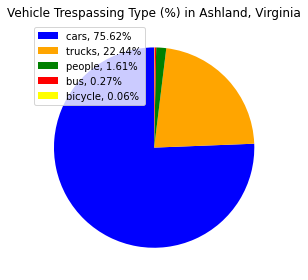

In [158]:
pieChart(totals, "Ashland, Virginia")

In [91]:
tncn = pd.read_excel('/Users/devam/PycharmProjects/GovSTEMStuff/Factors-Associated-with-Railroad-Trespassing-Events/datasets/Thomasville North Carolina - North Camera.xlsx')

In [92]:
tncn.head(5)

,_id,start_time,end_time,type,weather,trajectory,location_id,clip,link,duration,validation,explanation,combined event,dow,hod,month,year,updatecombined,updateobject
0,5ff088c0609ebab7317b1987,2021-01-02 09:49:12,2021-01-02 09:49:19,person,Clouds,"[[1271,955],[1276,955],[1278,952],[1281,953],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,7,True,NaN,0,7,9,1,2021,False,{'person': 1}
1,5ff0e812ff9a443328c54796,2021-01-02 16:34:41,2021-01-02 16:34:55,person,Clear,"[[1346,982],[1347,982],[1349,981],[1354,981],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,14,True,NaN,0,7,16,1,2021,False,{'person': 1}
2,5ff472e2921d07d5b1af0427,2021-01-05 09:07:44,2021-01-05 09:08:19,person,Clouds,"[[498,650],[500,647],[520,647],[522,645],[523,...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,35,True,NaN,0,3,9,1,2021,False,{'person': 3}
3,5ff543ed2d04bd89ebb809e2,2021-01-05 23:59:37,2021-01-05 23:59:45,person,Clouds,"[[1258,713],[1257,716],[1256,716],[1255,716],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,8,True,NaN,0,3,23,1,2021,False,{'person': 1}
4,5ff605d5609ebab7317b198f,2021-01-06 13:47:20,2021-01-06 13:47:22,person,Clear,"[[777,634],[777,636],[777,636],[775,637],[774,...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,2,True,NaN,0,4,13,1,2021,False,{'person': 1}


In [162]:
tncn = tncn[tncn['validation'] == True]

,_id,start_time,end_time,type,weather,trajectory,location_id,clip,link,duration,validation,explanation,combined event,dow,hod,month,year,updatecombined,updateobject
0,5ff088c0609ebab7317b1987,2021-01-02 09:49:12,2021-01-02 09:49:19,person,Clouds,"[[1271,955],[1276,955],[1278,952],[1281,953],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,7,True,NaN,0,7,9,1,2021,False,{'person': 1}
1,5ff0e812ff9a443328c54796,2021-01-02 16:34:41,2021-01-02 16:34:55,person,Clear,"[[1346,982],[1347,982],[1349,981],[1354,981],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,14,True,NaN,0,7,16,1,2021,False,{'person': 1}
2,5ff472e2921d07d5b1af0427,2021-01-05 09:07:44,2021-01-05 09:08:19,person,Clouds,"[[498,650],[500,647],[520,647],[522,645],[523,...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,35,True,NaN,0,3,9,1,2021,False,{'person': 3}
3,5ff543ed2d04bd89ebb809e2,2021-01-05 23:59:37,2021-01-05 23:59:45,person,Clouds,"[[1258,713],[1257,716],[1256,716],[1255,716],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,8,True,NaN,0,3,23,1,2021,False,{'person': 1}
4,5ff605d5609ebab7317b198f,2021-01-06 13:47:20,2021-01-06 13:47:22,person,Clear,"[[777,634],[777,636],[777,636],[775,637],[774,...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,2,True,NaN,0,4,13,1,2021,False,{'person': 1}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,61bcf276d4aed5fa1007011e,2021-12-17 15:26:26,2021-12-17 15:26:28,person,Clouds,"[[1265,1001],[1268,1002],[1273,1000],[1279,100...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,2,True,NaN,0,6,15,12,2021,False,{'person': 3}
368,61bd03b4d4aed5fa1007012e,2021-12-17 16:39:54,2021-12-17 16:40:03,person,Clouds,"[[1734,761],[1729,765],[1713,777],[1711,777],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,9,True,NaN,0,6,16,12,2021,False,{'person': 1}
369,61be3fb6d4aed5fa1007015b,2021-12-18 15:08:19,2021-12-18 15:08:20,person,Rain,"[[1665,792],[1659,791],[1654,790],[1647,792],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,1,True,NaN,0,7,15,12,2021,False,{'person': 1}
370,61c09bd1d4aed5fa10070242,2021-12-20 10:05:47,2021-12-20 10:05:52,person,Clouds,"[[1246,997],[1250,996],[1252,997],[1258,994],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,5,True,NaN,0,2,10,12,2021,False,{'person': 1}


In [161]:
tncn.head(4)

,_id,start_time,end_time,type,weather,trajectory,location_id,clip,link,duration,validation,explanation,combined event,dow,hod,month,year,updatecombined,updateobject
0,5ff088c0609ebab7317b1987,2021-01-02 09:49:12,2021-01-02 09:49:19,person,Clouds,"[[1271,955],[1276,955],[1278,952],[1281,953],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,7,True,NaN,0,7,9,1,2021,False,{'person': 1}
1,5ff0e812ff9a443328c54796,2021-01-02 16:34:41,2021-01-02 16:34:55,person,Clear,"[[1346,982],[1347,982],[1349,981],[1354,981],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,14,True,NaN,0,7,16,1,2021,False,{'person': 1}
2,5ff472e2921d07d5b1af0427,2021-01-05 09:07:44,2021-01-05 09:08:19,person,Clouds,"[[498,650],[500,647],[520,647],[522,645],[523,...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,35,True,NaN,0,3,9,1,2021,False,{'person': 3}
3,5ff543ed2d04bd89ebb809e2,2021-01-05 23:59:37,2021-01-05 23:59:45,person,Clouds,"[[1258,713],[1257,716],[1256,716],[1255,716],[...",5fee619bef304549535adcae,https://igct.s3.amazonaws.com/5fee619bef304549...,https://igct.s3.amazonaws.com/5fee619bef304549...,8,True,NaN,0,3,23,1,2021,False,{'person': 1}


In [163]:
tncn['type'].unique()

array(['person'], dtype=object)

In [165]:
tncntotals = calculateTotals(tncn)

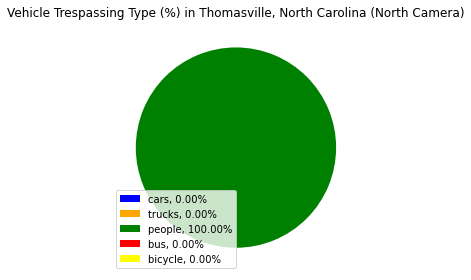

In [167]:
pieChart(tncntotals, "Thomasville, North Carolina (North Camera)")

In [173]:
tncs = pd.read_excel('/Users/devam/PycharmProjects/GovSTEMStuff/Factors-Associated-with-Railroad-Trespassing-Events/datasets/Thomasville North Carolina - South Camera.xlsx')

In [174]:
tncs.head(5)

,_id,start_time,end_time,type,weather,trajectory,location_id,clip,link,duration,validation,explanation,combined event,dow,hod,month,year,updatecombined,updateobject
0,5fd23ca1efcbe28207e7a220,2020-12-10 10:19:22,2020-12-10 10:19:33,person,Clear,"[[434,733],[435,733],[436,733],[437,733],[438,...",5fd165fa69af9b0eef63d40a,https://igct.s3.amazonaws.com/5fd165fa69af9b0e...,https://igct.s3.amazonaws.com/5fd165fa69af9b0e...,11,True,NaN,False,5,10,12,2020,False,{'person': 1}
1,5fd24449c222c369ce195579,2020-12-10 10:51:59,2020-12-10 10:52:11,person,Clear,"[[567,906],[563,905],[543,907],[536,909],[531,...",5fd165fa69af9b0eef63d40a,https://igct.s3.amazonaws.com/5fd165fa69af9b0e...,https://igct.s3.amazonaws.com/5fd165fa69af9b0e...,12,True,NaN,False,5,10,12,2020,False,{'person': 1}
2,5fd245b72ada9be468fb4f34,2020-12-10 10:57:52,2020-12-10 10:58:13,person,Clear,"[[669,710],[669,711],[670,712],[670,712],[673,...",5fd165fa69af9b0eef63d40a,https://igct.s3.amazonaws.com/5fd165fa69af9b0e...,https://igct.s3.amazonaws.com/5fd165fa69af9b0e...,21,True,NaN,False,5,10,12,2020,False,{'person': 1}
3,5fd253548e4b51fe07795178,2020-12-10 11:56:22,2020-12-10 11:56:25,person,Clear,"[[1365,642],[1356,642],[1353,644],[1351,643],[...",5fd165fa69af9b0eef63d40a,https://igct.s3.amazonaws.com/5fd165fa69af9b0e...,https://igct.s3.amazonaws.com/5fd165fa69af9b0e...,3,True,NaN,False,5,11,12,2020,False,{'person': 1}
4,5fd253e5efcbe28207e7a221,2020-12-10 11:58:49,2020-12-10 11:58:50,person,Clear,"[[1408,630],[1408,631],[1408,632],[1409,630]]",5fd165fa69af9b0eef63d40a,https://igct.s3.amazonaws.com/5fd165fa69af9b0e...,https://igct.s3.amazonaws.com/5fd165fa69af9b0e...,1,True,NaN,False,5,11,12,2020,False,{'person': 1}


In [175]:
tncs = tncs[tncs['validation'] == True]

In [176]:
tncs['type'].unique()

array(['person', 'bicycle', 'car'], dtype=object)

In [177]:
tncstotals = calculateTotals(tncs)

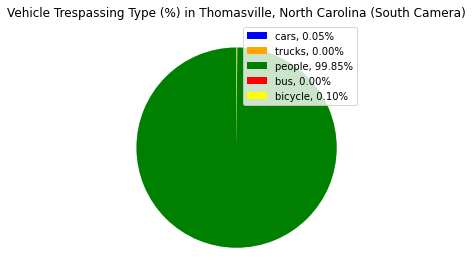

In [178]:
pieChart(tncstotals, 'Thomasville, North Carolina (South Camera)')